# Part 1 
## Importing necessary libraries

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import numpy as np



## Scraping data from Wikipedia

In [2]:
url = requests.get('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1012118802')

#convert to a beautifulsoup object
soup = bs(url.content)

## Scraping target table

In [3]:
#From HTLM script, table name = "wikitable sortable"
table = soup.find('table', {"class" : "wikitable sortable"})

## Converting a HTML table into a pandas dataframe

In [4]:
#board_array = np.asarray(table)
df = pd.read_html(str(table))
neighborhood=pd.DataFrame(df[0])
neighborhood.head()

Postal Code           Borough              Neighbourhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront

## Rows with "Not assigned" values
### Checking if column "Borough" contains "Not assigned" values and column "Neighbourhood" does not contain "Not assigned" values

In [5]:
neighborhood2 = neighborhood[(neighborhood.Borough == 'Not assigned') & (neighborhood.Neighbourhood != 'Not assigned')]
print('Table contains', neighborhood2.shape[0], 'rows(s) with the above condition' )

Table contains 0 rows(s) with the above condition


## Droping rows from column "Borough" with 'Not assigned' values

In [6]:
neighborhood = neighborhood[neighborhood['Borough'] != 'Not assigned']

print('Table contains', neighborhood.shape[0], 'rows and', neighborhood.shape[1], 'columns')
neighborhood.head()

Table contains 103 rows and 3 columns


Postal Code           Borough                                Neighbourhood
2         M3A        North York                                    Parkwoods
3         M4A        North York                             Victoria Village
4         M5A  Downtown Toronto                    Regent Park, Harbourfront
5         M6A        North York             Lawrence Manor, Lawrence Heights
6         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

# Part 2

## Importing geographical data

In [7]:
lat_long = pd.read_csv('Geospatial_Coordinates.csv')
lat_long.head(10)

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476
5         M1J  43.744734 -79.239476
6         M1K  43.727929 -79.262029
7         M1L  43.711112 -79.284577
8         M1M  43.716316 -79.239476
9         M1N  43.692657 -79.264848

## Joining importing data with dataframe from part 1 using a primary key

In [8]:
merged_df = pd.merge(neighborhood, lat_long, on="Postal Code")
merged_df.head()

Postal Code           Borough                                Neighbourhood  \
0         M3A        North York                                    Parkwoods   
1         M4A        North York                             Victoria Village   
2         M5A  Downtown Toronto                    Regent Park, Harbourfront   
3         M6A        North York             Lawrence Manor, Lawrence Heights   
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

    Latitude  Longitude  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.654260 -79.360636  
3  43.718518 -79.464763  
4  43.662301 -79.389494

# Part 3

In [9]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # library to handle JSON files

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



## Boroughs that contain the word Toronto

In [10]:
import re
merged_df2 = merged_df[merged_df['Borough'].str.contains('Toronto')].reset_index().drop('index', axis=1)
merged_df2

Postal Code           Borough  \
0          M5A  Downtown Toronto   
1          M7A  Downtown Toronto   
2          M5B  Downtown Toronto   
3          M5C  Downtown Toronto   
4          M4E      East Toronto   
5          M5E  Downtown Toronto   
6          M5G  Downtown Toronto   
7          M6G  Downtown Toronto   
8          M5H  Downtown Toronto   
9          M6H      West Toronto   
10         M5J  Downtown Toronto   
11         M6J      West Toronto   
12         M4K      East Toronto   
13         M5K  Downtown Toronto   
14         M6K      West Toronto   
15         M4L      East Toronto   
16         M5L  Downtown Toronto   
17         M4M      East Toronto   
18         M4N   Central Toronto   
19         M5N   Central Toronto   
20         M6N      Toronto/York   
21         M4P   Central Toronto   
22         M5P   Central Toronto   
23         M6P      West Toronto   
24         M4R   Central Toronto   
25         M5R   Central Toronto   
26         M6R      West Toronto   
27         M4S   Central Toronto   
28         M5S  Downtown Toronto   
29         M6S      West Toronto   
30         M4T   Central Toronto   
31         M5T  Downtown Toronto   
32         M4V   Central Toronto   
33         M5V  Downtown Toronto   
34         M4W  Downtown Toronto   
35         M5W  Downtown Toronto   
36         M4X  Downtown Toronto   
37         M5X  Downtown Toronto   
38         M4Y  Downtown Toronto   
39         M7Y      East Toronto   

                                        Neighbourhood   Latitude  Longitude  
0                           Regent Park, Harbourfront  43.654260 -79.360636  
1         Queen's Park, Ontario Provincial Government  43.662301 -79.389494  
2                            Garden District, Ryerson  43.657162 -79.378937  
3                                      St. James Town  43.651494 -79.375418  
4                                         The Beaches  43.676357 -79.293031  
5                                         Berczy Park  43.644771 -79.373306  
6                                  Central Bay Street  43.657952 -79.387383  
7                                            Christie  43.669542 -79.422564  
8                            Richmond, Adelaide, King  43.650571 -79.384568  
9                        Dufferin, Dovercourt Village  43.669005 -79.442259  
10  Harbourfront East, Union Station, Toronto Islands  43.640816 -79.381752  
11                           Little Portugal, Trinity  43.647927 -79.419750  
12                       The Danforth West, Riverdale  43.679557 -79.352188  
13           Toronto Dominion Centre, Design Exchange  43.647177 -79.381576  
14       Brockton, Parkdale Village, Exhibition Place  43.636847 -79.428191  
15                     India Bazaar, The Beaches West  43.668999 -79.315572  
16                     Commerce Court, Victoria Hotel  43.648198 -79.379817  
17                                    Studio District  43.659526 -79.340923  
18                                      Lawrence Park  43.728020 -79.388790  
19                                           Roselawn  43.711695 -79.416936  
20  Runnymede, The Junction, Weston-Pellam Park, C...  43.673185 -79.487262  
21                                   Davisville North  43.712751 -79.390197  
22    Forest Hill North & West, Forest Hill Road Park  43.696948 -79.411307  
23                      High Park, The Junction South  43.661608 -79.464763  
24                  North Toronto West, Lawrence Park  43.715383 -79.405678  
25                The Annex, North Midtown, Yorkville  43.672710 -79.405678  
26                             Parkdale, Roncesvalles  43.648960 -79.456325  
27                                         Davisville  43.704324 -79.388790  
28                     University of Toronto, Harbord  43.662696 -79.400049  
29                                 Runnymede, Swansea  43.651571 -79.484450  
30                        Moore Park, Summerhill East  43.689574 -79.383160  
31          Kensington Market,

In [11]:
CLIENT_ID = 'VY2M1PLSLQIZVA1XAMRIFO1M0YSIKGQQGEIJAPAXE2MWA2K3' # your Foursquare ID
CLIENT_SECRET = 'WUVUBAYDOU2WZKUYPCZNDD4BJWN4ZWNMZTGUQI5124BV3EAJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

## Explore Neighborhoods in Toronto

In [12]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
neighborhood_latitude = location.latitude
neighborhood_longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(neighborhood_latitude, neighborhood_longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
toronto_venues = getNearbyVenues(names=merged_df2['Neighbourhood'],
                                   latitudes=merged_df2['Latitude'],
                                   longitudes=merged_df2['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Runnymede, The Junction, Weston-Pellam Park, Carlton Village
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harb

In [15]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(merged_df2['Latitude'], merged_df2['Longitude'], merged_df2['Borough'], merged_df2['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

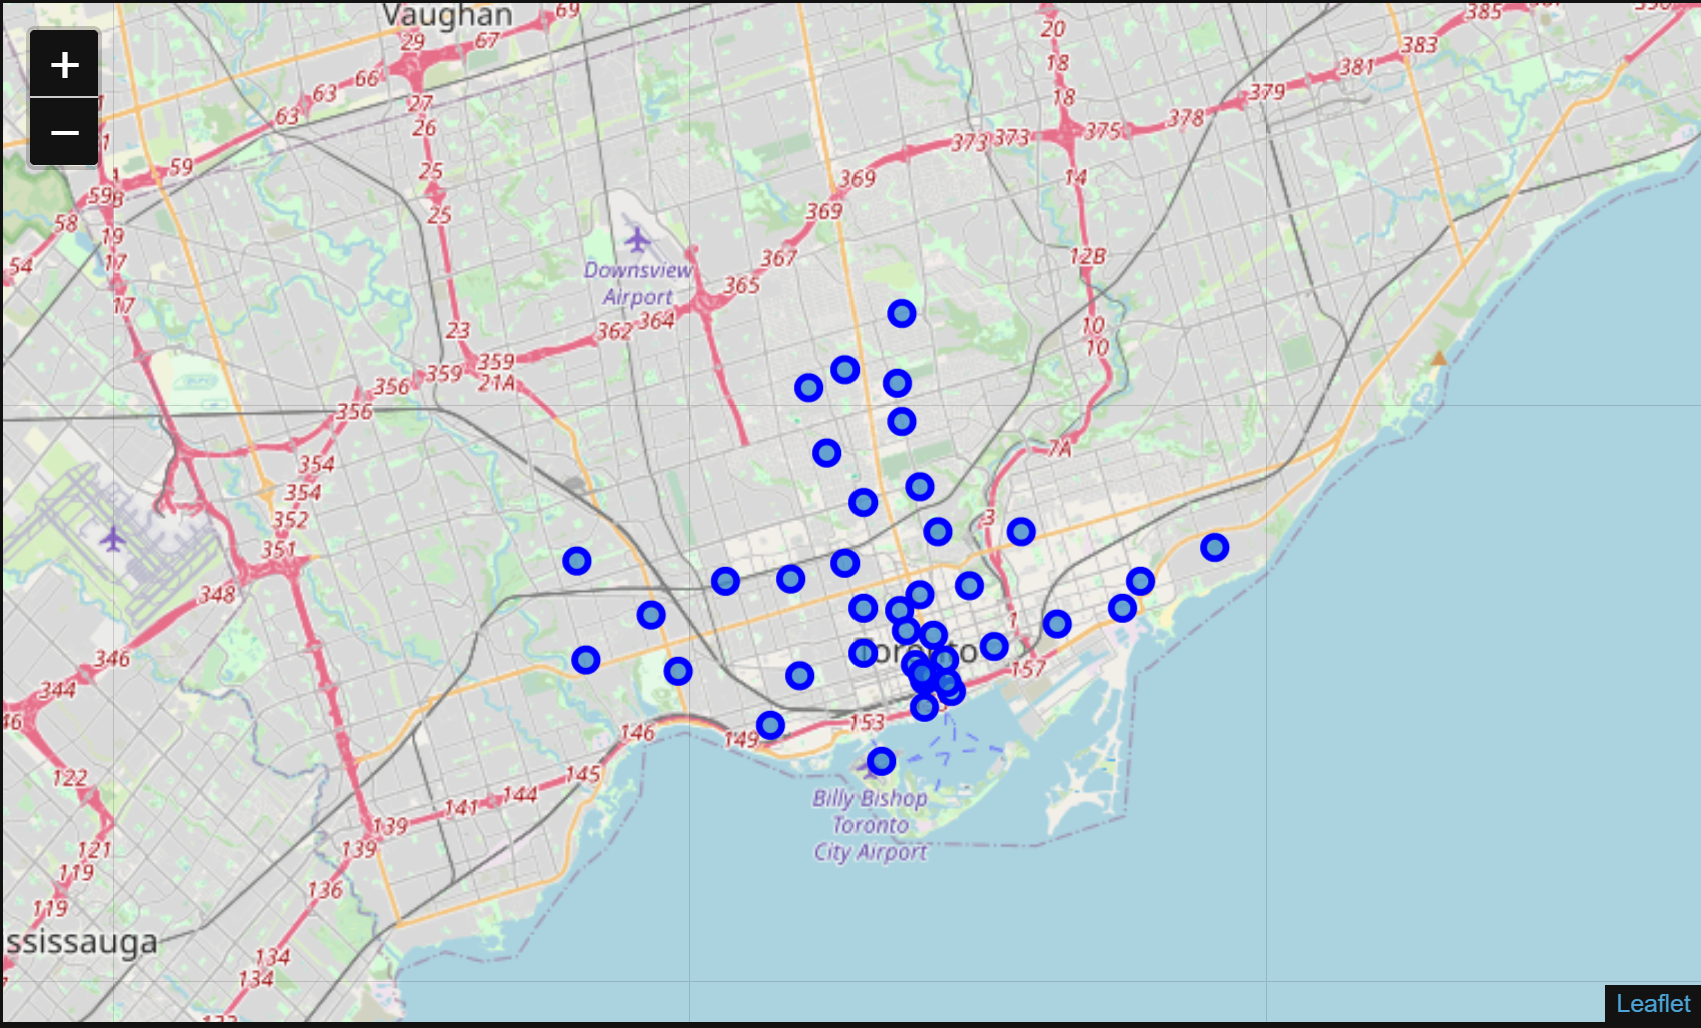

In [16]:
print(toronto_venues.shape)
toronto_venues.head()

(1606, 7)


Neighbourhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Regent Park, Harbourfront               43.65426              -79.360636   
1  Regent Park, Harbourfront               43.65426              -79.360636   
2  Regent Park, Harbourfront               43.65426              -79.360636   
3  Regent Park, Harbourfront               43.65426              -79.360636   
4  Regent Park, Harbourfront               43.65426              -79.360636   

                    Venue  Venue Latitude  Venue Longitude  \
0        Roselle Desserts       43.653447       -79.362017   
1           Tandem Coffee       43.653559       -79.361809   
2  Cooper Koo Family YMCA       43.653249       -79.358008   
3          Impact Kitchen       43.656369       -79.356980   
4     Body Blitz Spa East       43.654735       -79.359874   

        Venue Category  
0               Bakery  
1          Coffee Shop  
2  Distribution Center  
3           Restaurant  
4                  Spa

In [17]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 231 uniques categories.


## Analyze Each Neighborhood

In [18]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]


toronto_onehot.head()

Neighbourhood  Adult Boutique  Afghan Restaurant  Airport  \
0  Regent Park, Harbourfront               0                  0        0   
1  Regent Park, Harbourfront               0                  0        0   
2  Regent Park, Harbourfront               0                  0        0   
3  Regent Park, Harbourfront               0                  0        0   
4  Regent Park, Harbourfront               0                  0        0   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0                   0             0               0                0   
1                   0             0               0                0   
2                   0             0               0                0   
3                   0             0               0                0   
4                   0             0               0                0   

   Airport Terminal  American Restaurant  ...  Tibetan Restaurant  \
0                 0                    0  ...                   0   
1                 0                    0  ...                   0   
2                 0                    0  ...                   0   
3                 0                    0  ...                   0   
4                 0                    0  ...                   0   

   Toy / Game Store  Trail  Train Station  Vegetarian / Vegan Restaurant  \
0                 0      0              0                              0   
1                 0      0              0                              0   
2                 0      0              0                              0   
3                 0      0              0                              0   
4                 0      0              0                              0   

   Video Game Store  Vietnamese Restaurant  Wine Bar  Wine Shop  Yoga Studio  
0                 0                      0         0          0            0  
1                 0                      0         0          0            0  
2                 0                      0         0          0            0  
3                 0                      0         0          0            0  
4                 0                      0         0          0            0  

[5 rows x 232 columns]

In [19]:
toronto_onehot.shape

(1606, 232)

## Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [20]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

Neighbourhood  Adult Boutique  \
0                                         Berczy Park        0.000000   
1        Brockton, Parkdale Village, Exhibition Place        0.000000   
2   Business reply mail Processing Centre, South C...        0.000000   
3   CN Tower, King and Spadina, Railway Lands, Har...        0.000000   
4                                  Central Bay Street        0.000000   
5                                            Christie        0.000000   
6                                Church and Wellesley        0.012658   
7                      Commerce Court, Victoria Hotel        0.000000   
8                                          Davisville        0.000000   
9                                    Davisville North        0.000000   
10                       Dufferin, Dovercourt Village        0.000000   
11             First Canadian Place, Underground city        0.000000   
12    Forest Hill North & West, Forest Hill Road Park        0.000000   
13                           Garden District, Ryerson        0.000000   
14  Harbourfront East, Union Station, Toronto Islands        0.000000   
15                      High Park, The Junction South        0.000000   
16                     India Bazaar, The Beaches West        0.000000   
17          Kensington Market, Chinatown, Grange Park        0.000000   
18                                      Lawrence Park        0.000000   
19                           Little Portugal, Trinity        0.000000   
20                        Moore Park, Summerhill East        0.000000   
21                  North Toronto West, Lawrence Park        0.000000   
22                             Parkdale, Roncesvalles        0.000000   
23        Queen's Park, Ontario Provincial Government        0.000000   
24                          Regent Park, Harbourfront        0.000000   
25                           Richmond, Adelaide, King        0.000000   
26                                           Rosedale        0.000000   
27                                           Roselawn        0.000000   
28                                 Runnymede, Swansea        0.000000   
29  Runnymede, The Junction, Weston-Pellam Park, C...        0.000000   
30                                     St. James Town        0.000000   
31                        St. James Town, Cabbagetown        0.000000   
32                                     Stn A PO Boxes        0.000000   
33                                    Studio District        0.000000   
34  Summerhill West, Rathnelly, South Hill, Forest...        0.000000   
35                The Annex, North Midtown, Yorkville        0.000000   
36                                        The Beaches        0.000000   
37                       The Danforth West, Riverdale        0.000000   
38           Toronto Dominion Centre, Design Exchange        0.000000   
39                     University of Toronto, Harbord        0.000000   

    Afghan Restaurant  Airport  Airport Food Court  Airport Gate  \
0            0.000000   0.0000              0.0000        0.0000   
1            0.000000   0.0000              0.0000        0.0000   
2            0.000000   0.0000              0.0000        0.0000   
3            0.000000   0.0625              0.0625        0.0625   
4            0.000000   0.0000              0.0000        0.0000   
5            0.000000   0.0000              0.0000        0.0000   
6            0.012658   0.0000              0.0000        0.0000   
7            0.000000   0.0000              0.0000        0.0000   
8            0.000000   0.0000              0.0000        0.0000   
9            0.000000   0.0000              0.0000        0.0000   
10           0.000000   0.0000              0.0000        0.0000   
11           0.000000   0.0000              0.0000        0.0000   
12           0.000000   0.0000              0.0000        0.0000   
13           0.000000   0.0000              0.0000        0.0000   
14           0.000000   0.

In [21]:
toronto_grouped.shape

(40, 232)

## Printing each neighborhood along with the top 3 most common venues

In [22]:
num_top_venues = 3

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
          venue  freq
0   Coffee Shop  0.10
1  Cocktail Bar  0.07
2        Bakery  0.05


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.13
1     Coffee Shop  0.09
2  Breakfast Spot  0.09


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                venue  freq
0  Light Rail Station  0.12
1          Comic Shop  0.06
2       Garden Center  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0    Airport Lounge  0.12
1   Airport Service  0.12
2  Airport Terminal  0.12


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.17
1                Café  0.06
2  Italian Restaurant  0.06


----Christie----
           venue  freq
0  Grocery Store  0.25
1           Café  0.19
2           Park  0.12


----Church and Wellesley----
                 venue  freq
0

## Function to sort the venues in descending order

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## Creating the new dataframe and display the top 10 venues for each neighbourhood

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighbourhood 1st Most Common Venue  \
0                                        Berczy Park           Coffee Shop   
1       Brockton, Parkdale Village, Exhibition Place                  Café   
2  Business reply mail Processing Centre, South C...    Light Rail Station   
3  CN Tower, King and Spadina, Railway Lands, Har...        Airport Lounge   
4                                 Central Bay Street           Coffee Shop   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0          Cocktail Bar                Bakery            Restaurant   
1           Coffee Shop        Breakfast Spot           Yoga Studio   
2            Comic Shop         Garden Center        Farmers Market   
3       Airport Service      Airport Terminal       Harbor / Marina   
4                  Café    Italian Restaurant        Sandwich Place   

  5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
0    Seafood Restaurant         Farmers Market              Beer Bar   
1    Italian Restaurant  Performing Arts Venue             Nightclub   
2  Fast Food Restaurant                   Park                   Spa   
3                   Bar          Boat or Ferry              Boutique   
4       Thai Restaurant        Bubble Tea Shop          Burger Joint   

  8th Most Common Venue 9th Most Common Venue   10th Most Common Venue  
0           Cheese Shop              Pharmacy  Comfort Food Restaurant  
1          Climbing Gym            Restaurant            Burrito Place  
2         Burrito Place            Restaurant                  Brewery  
3      Sculpture Garden   Rental Car Location              Coffee Shop  
4                  Bank   Japanese Restaurant              Salad Place

## Clustering Neighborhoods

In [25]:
# set number of clusters
kclusters = 3

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Dataframe that includes the cluster as well as the top 10 venues for each neighbourhood

In [26]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = merged_df2

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

Postal Code           Borough                                Neighbourhood  \
0         M5A  Downtown Toronto                    Regent Park, Harbourfront   
1         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   
2         M5B  Downtown Toronto                     Garden District, Ryerson   
3         M5C  Downtown Toronto                               St. James Town   
4         M4E      East Toronto                                  The Beaches   

    Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
0  43.654260 -79.360636               0           Coffee Shop   
1  43.662301 -79.389494               0           Coffee Shop   
2  43.657162 -79.378937               0        Clothing Store   
3  43.651494 -79.375418               0           Coffee Shop   
4  43.676357 -79.293031               0                   Pub   

  2nd Most Common Venue 3rd Most Common Venue      4th Most Common Venue  \
0                Bakery                  Park                        Pub   
1      Sushi Restaurant           Yoga Studio              Burrito Place   
2           Coffee Shop                 Hotel  Middle Eastern Restaurant   
3          Cocktail Bar                  Café                  Gastropub   
4      Asian Restaurant     Health Food Store               Neighborhood   

  5th Most Common Venue 6th Most Common Venue  \
0        Breakfast Spot               Theater   
1                   Bar   Fried Chicken Joint   
2       Bubble Tea Shop        Cosmetics Shop   
3                   Gym   Moroccan Restaurant   
4                 Trail        Adult Boutique   

             7th Most Common Venue       8th Most Common Venue  \
0                             Café                  Shoe Store   
1                         Beer Bar                        Park   
2                             Café         Japanese Restaurant   
3               Seafood Restaurant              Clothing Store   
4  Molecular Gastronomy Restaurant  Modern European Restaurant   

  9th Most Common Venue     10th Most Common Venue  
0            Beer Store          French Restaurant  
1         Smoothie Shop         Mexican Restaurant  
2    Italian Restaurant                Pizza Place  
3           Cheese Shop                    Theater  
4    Miscellaneous Shop  Middle Eastern Restaurant

In [27]:
# create map
map_clusters = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

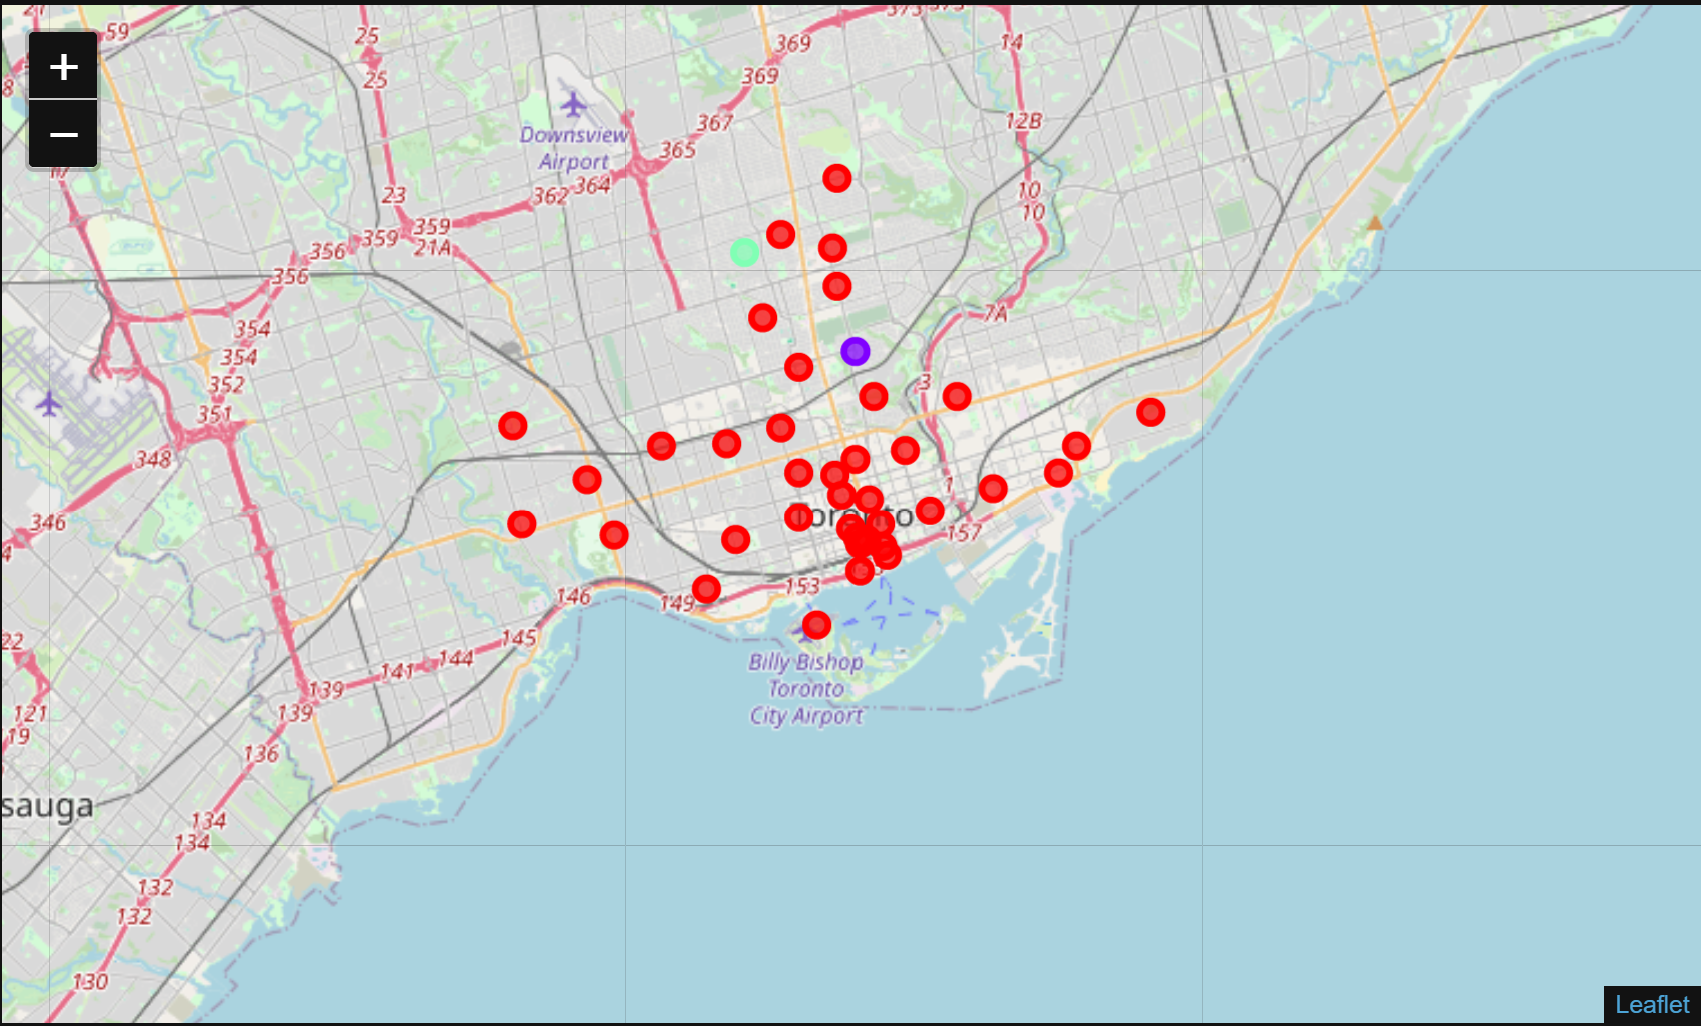

## Glympse of one of the clusters

In [28]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
0   Downtown Toronto               0           Coffee Shop   
1   Downtown Toronto               0           Coffee Shop   
2   Downtown Toronto               0        Clothing Store   
3   Downtown Toronto               0           Coffee Shop   
4       East Toronto               0                   Pub   
5   Downtown Toronto               0           Coffee Shop   
6   Downtown Toronto               0           Coffee Shop   
7   Downtown Toronto               0         Grocery Store   
8   Downtown Toronto               0           Coffee Shop   
9       West Toronto               0              Pharmacy   
10  Downtown Toronto               0           Coffee Shop   
11      West Toronto               0                   Bar   
12      East Toronto               0      Greek Restaurant   
13  Downtown Toronto               0           Coffee Shop   
14      West Toronto               0                  Café   
15      East Toronto               0  Fast Food Restaurant   
16  Downtown Toronto               0           Coffee Shop   
17      East Toronto               0           Coffee Shop   
18   Central Toronto               0                  Park   
20      Toronto/York               0     Convenience Store   
21   Central Toronto               0  Gym / Fitness Center   
22   Central Toronto               0         Jewelry Store   
23      West Toronto               0       Thai Restaurant   
24   Central Toronto               0        Clothing Store   
25   Central Toronto               0        Sandwich Place   
26      West Toronto               0        Breakfast Spot   
27   Central Toronto               0        Sandwich Place   
28  Downtown Toronto               0                  Café   
29      West Toronto               0                  Café   
31  Downtown Toronto               0                  Café   
32   Central Toronto               0           Coffee Shop   
33  Downtown Toronto               0        Airport Lounge   
34  Downtown Toronto               0                  Park   
35  Downtown Toronto               0           Coffee Shop   
36  Downtown Toronto               0           Coffee Shop   
37  Downtown Toronto               0           Coffee Shop   
38  Downtown Toronto               0           Coffee Shop   
39      East Toronto               0    Light Rail Station   

   2nd Most Common Venue  3rd Most Common Venue  \
0                 Bakery                   Park   
1       Sushi Restaurant            Yoga Studio   
2            Coffee Shop                  Hotel   
3           Cocktail Bar                   Café   
4       Asian Restaurant      Health Food Store   
5           Cocktail Bar                 Bakery   
6                   Café     Italian Restaurant   
7                   Café                   Park   
8                   Café             Restaurant   
9                 Bakery                    Bar   
10              Aquarium                  Hotel   
11           Coffee Shop       Asian Restaurant   
12           Coffee Shop     Italian Restaurant   
13                 Hotel                   Café   
14           Coffee Shop         Breakfast Spot   
15                  Park             Restaurant   
16            Restaurant                  Hotel   
17               Brewery                   Café   
18           Swim School               Bus Line   
20               Brewery   Caribbean Restaurant   
21                 Hotel         Breakfast Spot   
22                 Trail     Mexican Restaurant   
23                  Café     Mexican Restaurant   
24           Coffee Shop            Yoga Studio   
25                  Café            Coffee Shop   
26             Gift Shop                Dog Run   
27          Dessert Shop                    Gym   
28                   Bar    Japanese Restaurant   
29           Coffee Shop            Pizza Place   
31           Coffee Shop  Vietnamese Restaurant   
32          L